In [59]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np
import os

In [60]:
import matplotlib.pyplot as plt

#fasion mnist

fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

# train - > 이 배열은 모델 학습에 사용되는 훈련 셋
# test - > 이 배열은 모델 테스트에 사용되는 테스트 셋

In [61]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#60000개의 이미지 , 각 이미지는 28 x 28 픽셀로 표현
print("\ntrain_images.shape = ",train_images.shape)

# 훈련세트에는 60000개의 레이블이 있다."
print("\ntrain_labels length = ",len(train_labels))

#각 레이블은 0과 9사이의 정수입니다
print("\ntrain_labels = ",train_labels)

#테스트 세트에는 10,000개의 이미지가 있습니다. 이 이미지도 28x28 픽셀로 표현됩니다
print("\ntest_images.shape = ",test_images.shape)

#테스트 세트는 10,000개의 이미지에 대한 레이블을 가지고 있습니다
print("\ntest_labels length = ",len(test_labels))


train_images.shape =  (60000, 28, 28)

train_labels length =  60000

train_labels =  [9 0 0 ... 3 0 5]

test_images.shape =  (10000, 28, 28)

test_labels length =  10000


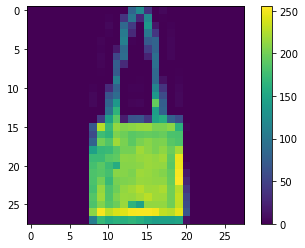

In [62]:

plt.figure()
plt.imshow(train_images[200])
plt.colorbar()
plt.grid(False)
plt.show()

In [63]:
# 신경망 모델에 주입하기 전 값의 범위를 0 ~ 1 사이로 조정
# 데이터 전처리
train_images = train_images / 255.0

test_images = test_images / 255.0

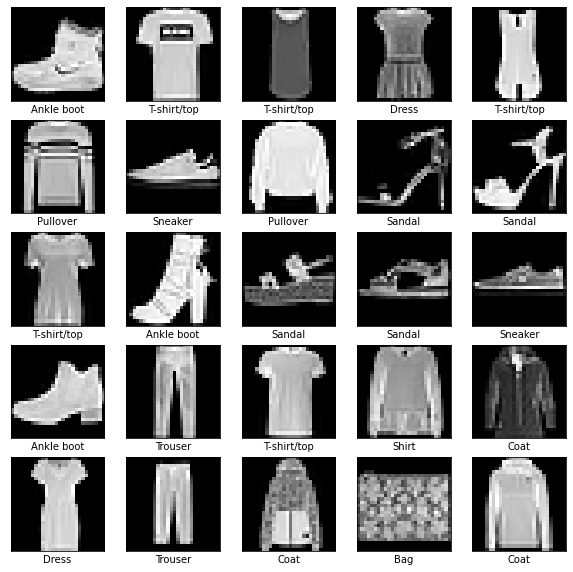

In [64]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [65]:
# 모델 생성 , 층 연결 및 구성

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'), # 밀집 연결 densly connected, 완전 연결 fully connected층이라 불림
    keras.layers.Dense(10, activation='softmax')
])



In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [67]:
# layers 속성으로 각 레이어의 특성 확인
l2=model.layers[1]
l3=model.layers[2]

print(l2.name, type(l2), l2.output_shape, l2.activation.__name__, l2.count_params())
print(l3.name, type(l3), l3.output_shape, l3.activation.__name__, l3.count_params())

dense_6 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 128) relu 100480
dense_7 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 10) softmax 1290


In [68]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5093 - accuracy: 0.8228
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3812 - accuracy: 0.8626
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3405 - accuracy: 0.8770
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3178 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2973 - accuracy: 0.8900


In [69]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)


313/313 - 0s - loss: 0.3516 - accuracy: 0.8759

테스트 정확도: 0.8758999705314636


In [70]:
predictions = model.predict(test_images)
print("\npredictions[0] = ",predictions[0])
print("\nnp.argmax(preditions[0]) = ",np.argmax(predictions[0]))
test_labels[0]


predictions[0] =  [4.6125979e-08 2.6296718e-09 4.2296826e-08 8.0018786e-10 3.4675773e-07
 4.7840229e-03 1.1868888e-07 8.1100790e-03 4.7176663e-06 9.8710060e-01]

np.argmax(preditions[0]) =  9


9

In [71]:
def plot_image(i,predictions_array,true_label,img):
    predictions_array=predictions_array[i]
    true_label=true_label[i]
    img=img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color) 
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

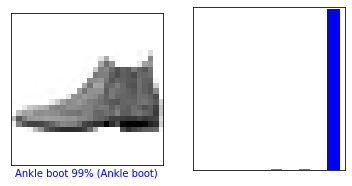

In [72]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

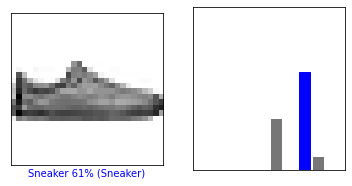

In [73]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

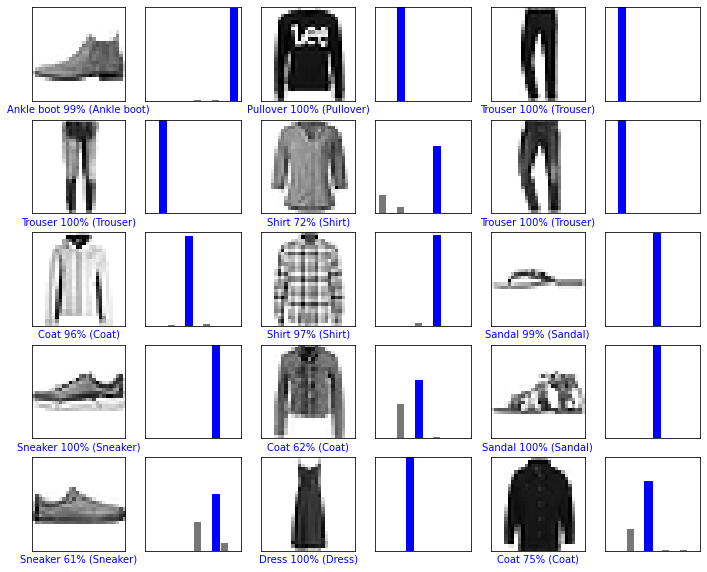

In [74]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [75]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [76]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [77]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.61260612e-08 2.62966671e-09 4.22966657e-08 8.00187860e-10
  3.46757048e-07 4.78402525e-03 1.18688654e-07 8.11007153e-03
  4.71764770e-06 9.87100601e-01]]


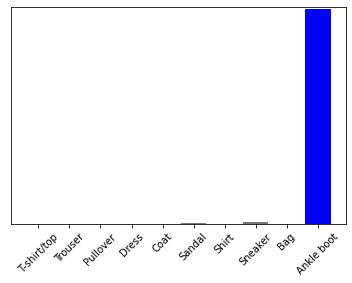

In [78]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [79]:
np.argmax(predictions_single[0])

9